In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [293]:
data_path = 'train.csv'
titanic_data = pd.read_csv(data_path)

# Context

In [294]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [295]:
titanic_data.shape

(100000, 12)

In [296]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Variable|Definition|Key|Description
---|---|---|---
PassengerId|PassengerId| |numerical, discrete 
Survived|Survival|0 = No, 1 = Yes|categorical, binary
Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|categorical
Name|Passemger's name| |String
Sex|Sex|male, female|categorical, binary
Age|Age in years| |numerical, discrete 
SibSp|number of siblings / spouses aboard the Titanic| |numerical, discrete 
Parch|number of parents / children aboard the Titanic| |numerical, discrete 
Ticket|Ticket number| |String
Fare|Passenger fare| |numerical, continuous
Cabin|Cabin number| |String
Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|categorical

# Data quality assessment

In [297]:
titanic_data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

<AxesSubplot:>

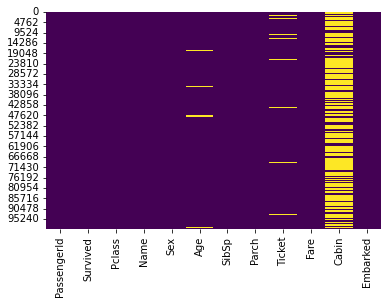

In [298]:
sns.heatmap(titanic_data.isnull(), cmap = 'viridis', cbar=False)

There aren't features always having missing values the same time. We can see that most of the missing values have features "Cabin" and "Ticket".

In [299]:
titanic_data['Ticket'].value_counts()

A/5             602
C.A.            177
SC/PARIS        145
SOTON/O.Q.       80
SC               57
               ... 
421812            1
PC 420601         1
PC 26800          1
STON/O 23755      1
458074            1
Name: Ticket, Length: 75331, dtype: int64

In [300]:
titanic_data['Cabin'].value_counts()

C19828    6
C6906     5
C13699    5
C14534    5
B11110    5
         ..
A21234    1
A4905     1
C7208     1
A5788     1
D17243    1
Name: Cabin, Length: 26992, dtype: int64

These signs do not have a specific format, we cannot restore them. Let us exclude these signs from consideration.

In [301]:
titanic_data=titanic_data.drop(['Ticket', 'Cabin'], axis=1)

In [302]:
titanic_data.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,27.14,S
1,0,3,"Bryan, Drew",male,NaN,0,0,13.35,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,71.29,S
3,0,3,"Kramer, James",male,19.00,0,0,13.04,S
4,1,3,"Bond, Michael",male,25.00,0,0,7.76,S
...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,14.86,C
99996,0,2,"Brown, Herman",male,66.00,0,0,11.15,S
99997,0,3,"Childress, Charles",male,37.00,0,0,9.95,S


Recover missing data in a column "Age"

C:\Users\Evgen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

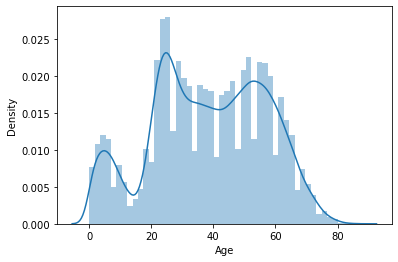

In [303]:
sns.distplot(a=titanic_data['Age'])

In [304]:
def fill_empty_age(x):
    if np.isnan(x):
        return np.random.randint(titanic_data['Age'].mean()-titanic_data['Age'].std(), titanic_data['Age'].mean()+titanic_data['Age'].std(), ())
    return x
titanic_data['Age'] = titanic_data['Age'].apply(fill_empty_age)

Recover missing data in a column "Embarked"

In [305]:
emb_data=titanic_data['Embarked'].value_counts()


<AxesSubplot:xlabel='Embarked'>

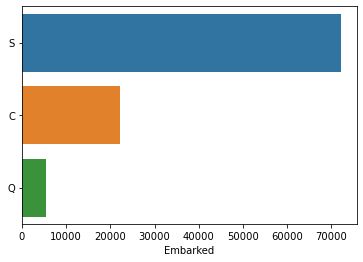

In [306]:
sns.barplot(x=emb_data, y=emb_data.index)

In [307]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')

Recover missing data in a column "Fare"

In [308]:
mean_fare_pclass=titanic_data.groupby(by='Pclass').Fare.mean()

In [309]:
def fill_empty_fare(x):
    if np.isnan(x.Fare):
        x['Fare'] = mean_fare_pclass[x.Pclass]
    return x
titanic_data=titanic_data.apply(fill_empty_fare, axis=1)

In [310]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [311]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          100000 non-null  float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Fare         100000 non-null  float64
 9   Embarked     100000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 7.6+ MB


In [312]:
titanic_data.iloc[:,5:].describe()

,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,38.326410,0.397690,0.454560,43.929065
std,18.109033,0.862566,0.950076,69.552036
min,0.080000,0.000000,0.000000,0.680000
25%,25.000000,0.000000,0.000000,10.040000
50%,39.000000,0.000000,0.000000,24.470000
75%,53.000000,1.000000,1.000000,33.500000
max,87.000000,8.000000,9.000000,744.660000


C:\Users\Evgen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

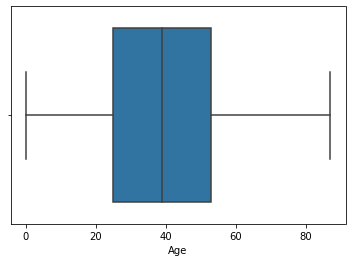

In [313]:
sns.boxplot(titanic_data['Age'])

C:\Users\Evgen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

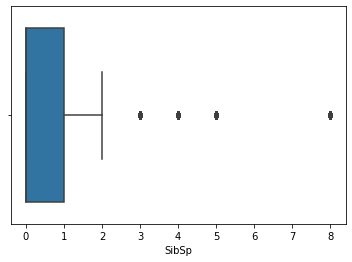

In [314]:
sns.boxplot(titanic_data['SibSp'])

C:\Users\Evgen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch'>

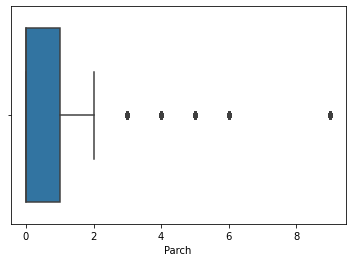

In [315]:
sns.boxplot(titanic_data['Parch'])

C:\Users\Evgen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

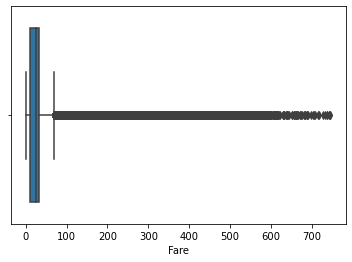

In [316]:
sns.boxplot(titanic_data['Fare'])

<AxesSubplot:ylabel='Survived'>

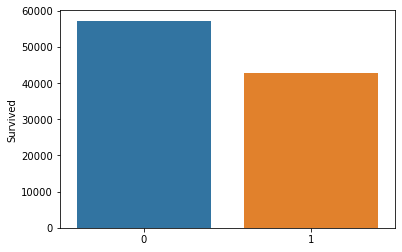

In [317]:
sns.barplot(x = (titanic_data['Survived'].value_counts()).index, y = titanic_data['Survived'].value_counts())

In [318]:
perc_survived = titanic_data['Survived'].value_counts()[1]/titanic_data.shape[0]
perc_survived

0.42774

In [319]:
Pclass_data = titanic_data['Pclass'].value_counts()
Pclass_data

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

<AxesSubplot:ylabel='Pclass'>

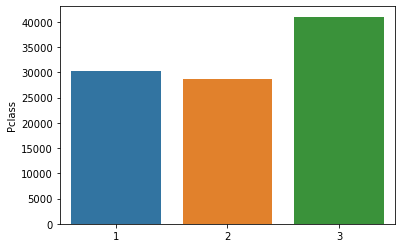

In [320]:
sns.barplot(x=Pclass_data.index, y=Pclass_data)

In [321]:
emb_data=titanic_data['Embarked'].value_counts()
emb_data


S    72389
C    22187
Q     5424
Name: Embarked, dtype: int64

<AxesSubplot:ylabel='Embarked'>

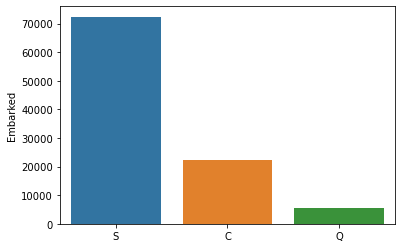

In [322]:
sns.barplot(x=emb_data.index, y=emb_data)

In [323]:
sex_data = titanic_data['Sex'].value_counts()
sex_data

male      56114
female    43886
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

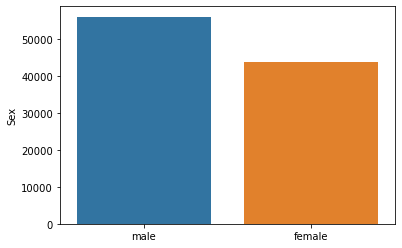

In [324]:
sns.barplot(x=sex_data.index, y=sex_data)

let's change the column "Sex" to accept male = 0, female = 1

In [325]:
def fill_sex(x):
    if x.Sex=='male':
        x.Sex = 0
    else:
        x.Sex = 1
    return x
titanic_data=titanic_data.apply(fill_sex, axis=1)

In [326]:
sex_data = titanic_data['Sex'].value_counts()
sex_data

0    56114
1    43886
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

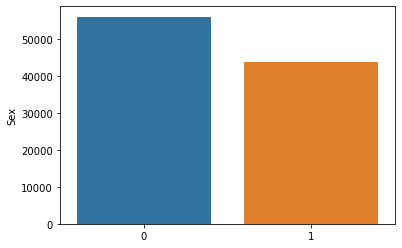

In [327]:
sns.barplot(x=sex_data.index, y=sex_data)

# Data exploration

Let's look at the relationships between all features

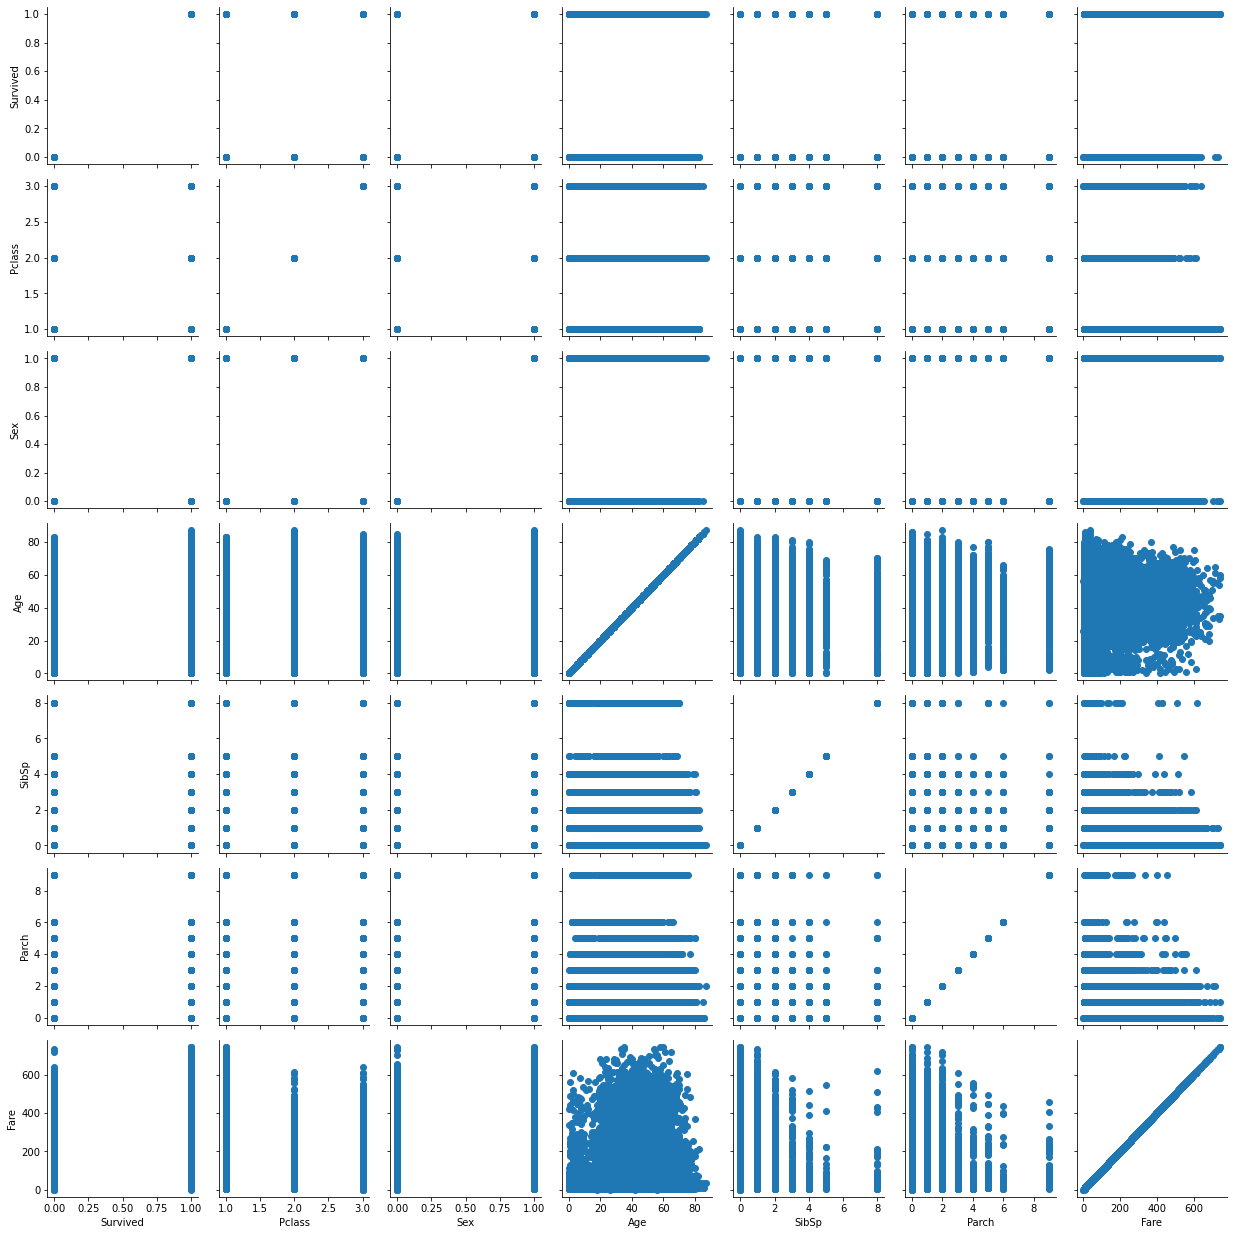

In [328]:
pair_grid_plot=sns.PairGrid(titanic_data.iloc[:,1:])
pair_grid_plot.map(plt.scatter)

Let's look at the correlation matrix

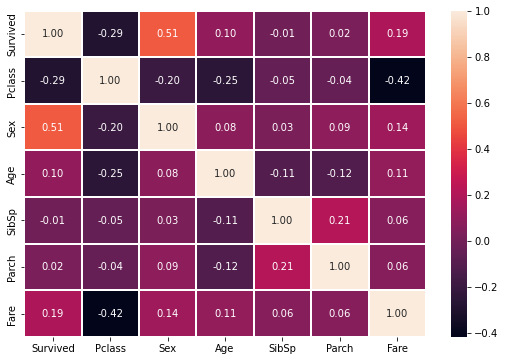

In [329]:
corr = titanic_data.iloc[:,1:].corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot=True, linewidths=1.5, fmt='.2f', ax=ax)
plt.show()

The most correlated features:
- Sex/Survived
- Pclass/Fare

Let's explore how sex affects survival

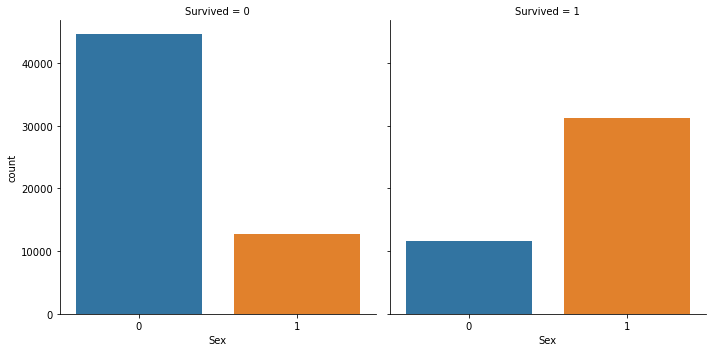

In [330]:
sns.catplot(x = 'Sex', col = 'Survived', kind = 'count', data = titanic_data)

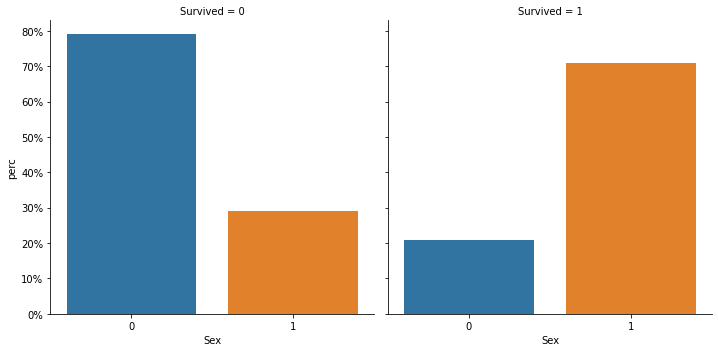

In [331]:
titanic_data_ad = (titanic_data.groupby(['Sex'])['Survived']
 .value_counts(normalize=True).round(2)
 .to_frame('perc').reset_index())
from  matplotlib.ticker import PercentFormatter
p = sns.catplot(x = 'Sex', y='perc', col = 'Survived', kind = 'bar', data = titanic_data_ad)
for ax in p.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

we can see that there are more survivors among women

In [332]:
pd.crosstab(titanic_data.Pclass, titanic_data.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,12739,17576,30315
2,13622,15057,28679
3,30865,10141,41006
All,57226,42774,100000


Let's explore how Pclass affects survival

In [333]:
print("% of survivals in") 
print("Pclass=1 : ", titanic_data.Survived[titanic_data.Pclass == 1].sum()/titanic_data[titanic_data.Pclass == 1].Survived.count())
print("Pclass=2 : ", titanic_data.Survived[titanic_data.Pclass == 2].sum()/titanic_data[titanic_data.Pclass == 2].Survived.count())
print("Pclass=3 : ", titanic_data.Survived[titanic_data.Pclass == 3].sum()/titanic_data[titanic_data.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.5797789873000165
Pclass=2 :  0.5250183060776178
Pclass=3 :  0.24730527239916109


The largest percentage of dead passengers among 3rd class passengers

C:\Users\Evgen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


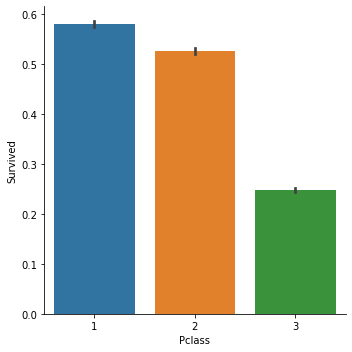

In [334]:
sns.catplot('Pclass','Survived', kind = 'bar', data = titanic_data)

Let's add gender to the consideration and make sure that for all classes the relationship between gender and survival is preserved

In [335]:
pd.crosstab([titanic_data.Sex, titanic_data.Survived], titanic_data.Pclass, margins = True).style.background_gradient(cmap = 'autumn_r')

C:\Users\Evgen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


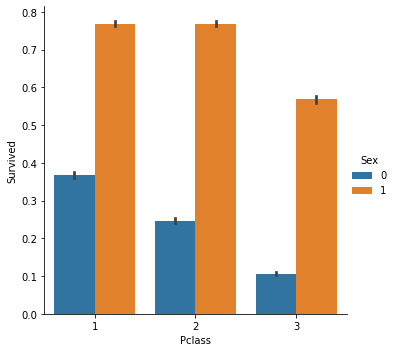

In [336]:
sns.catplot('Pclass','Survived',hue = 'Sex', kind = 'bar', data = titanic_data)

We can see that most of the fatalities are among third-class male passengers.

Let's explore how Embarked affects survival

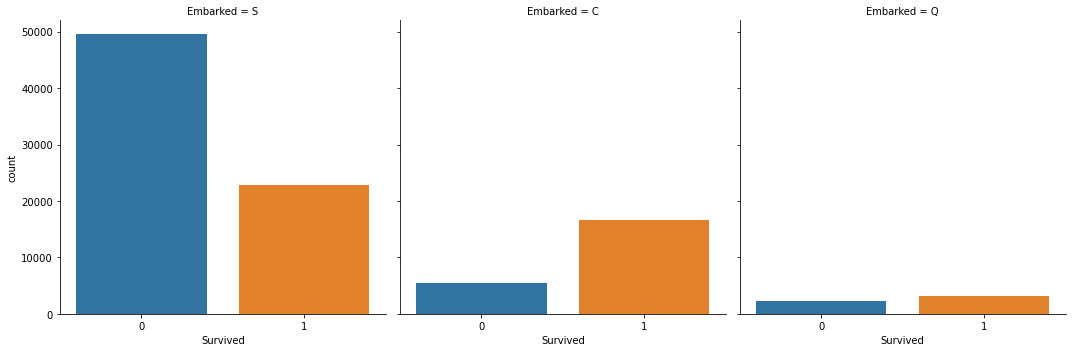

In [337]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=titanic_data)

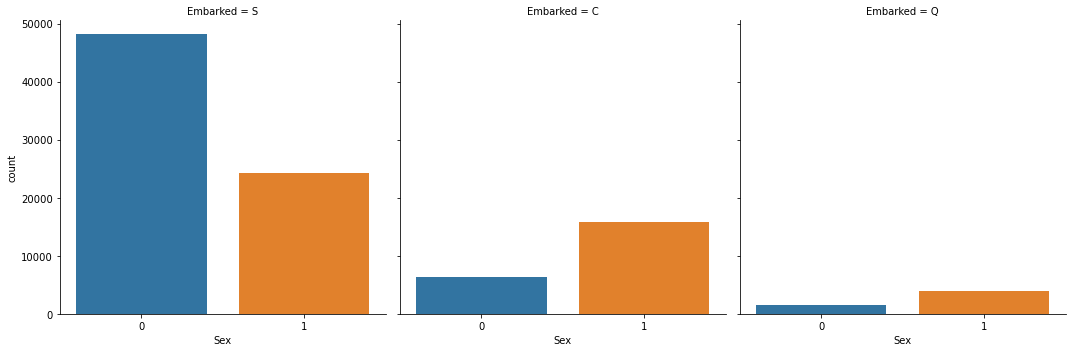

In [338]:
sns.catplot(x = 'Sex', col = 'Embarked', kind = 'count', data = titanic_data)

As can be seen from the graphs, most of the survivors were among the people who landed in port C, but this is due to the fact that among the passengers who landed in port C, most of the women

Let's explore how Age affects survival. To divide passengers into several age groups

In [339]:
titanic_data['Age_bin'] = np.nan
for i in range(8,0,-1):
    titanic_data.loc[titanic_data['Age'] <= i*10, 'Age_bin'] = i

print(titanic_data[['Age' , 'Age_bin']].head(10))

     Age  Age_bin
0  24.00      3.0
1  23.00      3.0
2   0.33      1.0
3  19.00      2.0
4  25.00      3.0
5  35.00      4.0
6   7.00      1.0
7   6.00      1.0
8  27.00      3.0
9  66.00      7.0


C:\Users\Evgen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


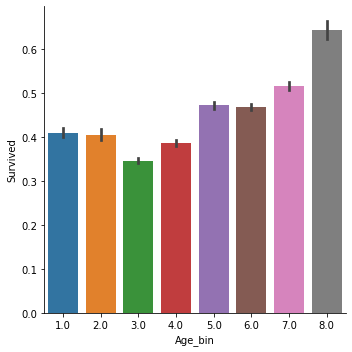

In [340]:
sns.catplot('Age_bin','Survived',kind='bar',data = titanic_data)

Мы можем видеть что больше всего выживших среди людей более старшего возраста от 50-80 лет, за ними следуют дети до 10 лет. Давайте посмотрим как это соотносится с полом 

C:\Users\Evgen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


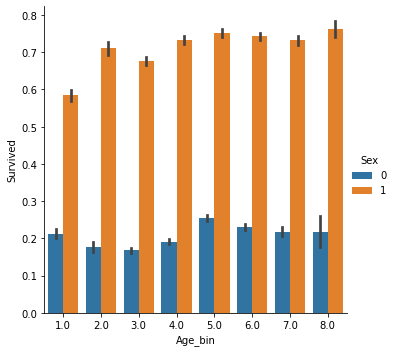

In [341]:
sns.catplot('Age_bin','Survived', hue='Sex', kind='bar',data = titanic_data)

From the graph above, it can be seen that the most survivors among older women

Let's explore how SibSp and Parch affects survival.

C:\Users\Evgen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


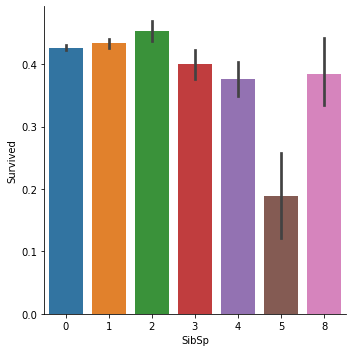

In [342]:
sns.catplot('SibSp','Survived', kind = 'bar', data = titanic_data)

C:\Users\Evgen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


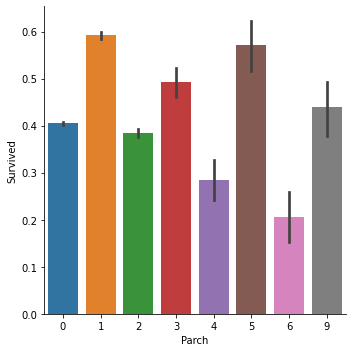

In [343]:
sns.catplot('Parch','Survived', kind = 'bar', data = titanic_data)

From the above graphs, there is no relationship between the number of relatives and survival.
The effect of Fare on survival is indirectly taken into account through the Pclass, since people with higher fare bought more expensive places, which is also noticeable in the correlation matrix.

# Summary

1. There are no linearly dependent features in the dataset
2. The most important signs for prediction are:
    - Sex
    - Age
    - Pclass